<a href="https://colab.research.google.com/github/mariko-sawada/Popular_Baby_Name/blob/main/popular_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The trend of popular baby names in the past 40 years

## 1. Import libraries

In [ ]:
# Import nessesary libraries
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

## 2. Data Collection

In [ ]:
url = "https://www.ssa.gov/cgi-bin/popularnames.cgi"

# Prepare parameters to request a specific page
post_params = { 
    'top'  : '10',
    'year' : '2020',
    'number':'n'
    }
# Encode the parameters
data = urllib.parse.urlencode(post_params)
data = data.encode('ascii')

# Request the page with the encoded parameter
response = urllib.request.urlopen(url, data=data)
# Extract html codes from the response
html = response.read()

# Create BeautifulSoup object with html parser
soup = BeautifulSoup(html, 'html.parser')
#print(soup.prettify())

# Find all items under "<td>" tags
items = soup.find_all("td")

In [ ]:
# Extract column names I want to use later
columns = [name.text for name in items[3].find_all('th')]
columns

['Rank', 'Male name', 'Number of males', 'Female name', 'Number of females']

In [ ]:
# Prepare an empty dataframe with the obtained column names 
columns = columns.append('Year')
df = pd.DataFrame(columns=columns)

# Collect the data by repeatedly parse requested pages
for year in range(1980,2021):
  post_params = {'top'  : '100', 'year' : year, 'number':'n'}
  data = urllib.parse.urlencode(post_params)
  data = data.encode('ascii')
  
  response = urllib.request.urlopen(url, data=data)
  html = response.read()
  
  soup = BeautifulSoup(html, 'html.parser')
  items = soup.find_all("td")
  contents = items[3].find_all('td')
  
  for i in range(len(contents)-1):
    if i % 5 == 0:
      rank = contents[i].text
      male_name = contents[i+1].text
      num_male = contents[i+2].text
      female_name = contents[i+3].text
      num_female = contents[i+4].text
      df = df.append(
            {
                'Rank':rank,
             'Male name':male_name,
             'Number of males': num_male,
             'Female name':female_name,
             'Number of females':num_female,
             'Year': year
             }
            , ignore_index=True
            )

In [ ]:
# Check the obtained dataset
df.head()

,Rank,Male name,Number of males,Female name,Number of females,Year
0,1,Michael,"68,704",Jennifer,"58,379",1980.0
1,2,Christopher,"49,096",Amanda,"35,817",1980.0
2,3,Jason,"48,170",Jessica,"33,924",1980.0
3,4,David,"41,920",Melissa,"31,639",1980.0
4,5,James,"39,329",Sarah,"25,758",1980.0


In [ ]:
df.tail()

,Rank,Male name,Number of males,Female name,Number of females,Year
4095,96,Adam,"3,751",Lydia,"2,767",2020.0
4096,97,Jace,"3,745",Jade,"2,717",2020.0
4097,98,Wesley,"3,668",Peyton,"2,703",2020.0
4098,99,Kayden,"3,613",Brielle,"2,697",2020.0
4099,100,Silas,"3,599",Adeline,"2,694",2020.0


## 3. Preprocessing

In [ ]:
df1 = df.copy()

In [ ]:
# Remove non-number characters
df1['Number of females'] = df1['Number of females'].replace("[^0-9]+", "", regex = True).astype(int)
df1['Number of males'] = df1['Number of males'].replace("[^0-9]+", "", regex = True).astype(int)
# Convert numerical objects from string into integer
df1['Year'] = df1['Year'].astype(int)
df1['Rank'] = df1['Rank'].astype(int)

# Check the preprocessed dataset
df1.head()

,Rank,Male name,Number of males,Female name,Number of females,Year
0,1,Michael,68704,Jennifer,58379,1980
1,2,Christopher,49096,Amanda,35817,1980
2,3,Jason,48170,Jessica,33924,1980
3,4,David,41920,Melissa,31639,1980
4,5,James,39329,Sarah,25758,1980


In [ ]:
# Add columns for name initials
df1['Female initial'] = df1['Female name'].apply(lambda x: x[0])
df1['Male initial'] = df1['Male name'].apply(lambda x: x[0])
# Add columns for number of letters
df1['Female num of letters'] = df1['Female name'].apply(len)
df1['Male num of letters'] = df1['Male name'].apply(len)
df1.head()

,Rank,Male name,Number of males,Female name,Number of females,Year,Female initial,Male initial,Female num of letters,Male num of letters
0,1,Michael,68704,Jennifer,58379,1980,J,M,8,7
1,2,Christopher,49096,Amanda,35817,1980,A,C,6,11
2,3,Jason,48170,Jessica,33924,1980,J,J,7,5
3,4,David,41920,Melissa,31639,1980,M,D,7,5
4,5,James,39329,Sarah,25758,1980,S,J,5,5


## 4. Visualization

### The latest trend
- What is the most popular initial letter 2020?
- What is the most popular number of letters in names in 2020?
- Are there new names in 2020 that were outside of the Top 100 ranking in the previous year?

### The long-term trend
- What was the past trend on the most popular initial letter of names? *(Not in the blog post)*
- How did the ranks of the all-time popular 10 names change over the past 40 years?
- How did the 10 most popular names change over 40 years? *(Not in the blog post)*
- How many names survived during the past 40 years?

###What is the most popular initial letter 2020?

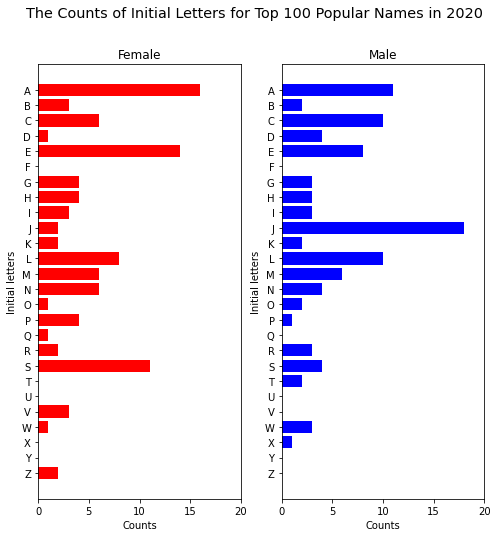

In [ ]:
df_2020 = df1[df.Year == 2020]

female_ini_sum = df_2020.groupby('Female initial').size()
male_ini_sum = df_2020.groupby('Male initial').size()

alphabet_list = list(string.ascii_uppercase)

for letter in alphabet_list:
  if not letter in list(female_ini_sum.index):
    series = pd.Series(0, index = [letter])
    female_ini_sum = female_ini_sum.append(series)
  
  if not letter in list(male_ini_sum.index):
    series = pd.Series(0, index = [letter]) 
    male_ini_sum = male_ini_sum.append(series)

female_ini_sum = female_ini_sum.sort_index()
male_ini_sum = male_ini_sum.sort_index()

fig = plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.barh(female_ini_sum.index, female_ini_sum.values, color='red')
plt.gca().invert_yaxis()
plt.xlim(0,20)
plt.ylabel('Initial letters')
plt.xlabel('Counts')
plt.title('Female')


plt.subplot(1,2,2)
plt.barh(male_ini_sum.index, male_ini_sum.values, color='blue')
plt.xlim(0,20)
plt.gca().invert_yaxis()
plt.ylabel('Initial letters')
plt.xlabel('Counts')
plt.title('Male')
plt.suptitle("The Counts of Initial Letters for Top 100 Popular Names in 2020", size='x-large')
plt.show()

### What is the most popular length of names in 2020?

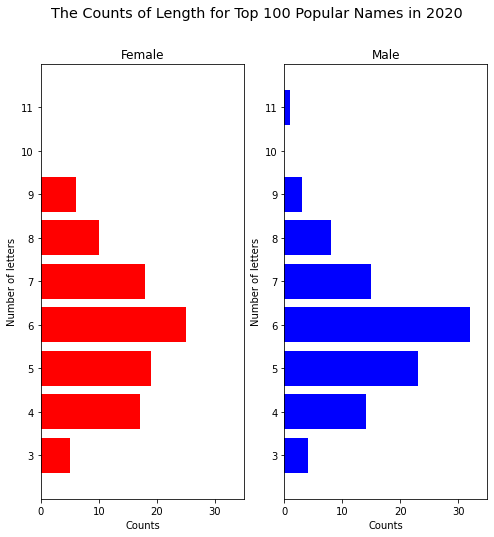

In [ ]:
female_num_letters = df_2020.groupby('Female num of letters').size()
male_num_letters = df_2020.groupby('Male num of letters').size()

#What is the most popular number of letters in names in 2020?

fig = plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.barh(female_num_letters.index, female_num_letters.values, color='red')
plt.ylabel('Number of letters')
plt.xlabel('Counts')
plt.title('Female')
plt.yticks(np.arange(min(min(female_num_letters.index), min(male_num_letters.index)), max(max(female_num_letters.index), max(male_num_letters.index))+1,1))
plt.ylim(min(min(female_num_letters.index), min(male_num_letters.index))-1, max(max(female_num_letters.index), max(male_num_letters.index))+1)
plt.xlim(0, 35)

plt.subplot(1,2,2)
plt.barh(male_num_letters.index, male_num_letters.values, color='blue')
plt.ylabel('Number of letters')
plt.xlabel('Counts')
plt.title('Male')
plt.yticks(np.arange(min(min(female_num_letters.index), min(male_num_letters.index)), max(max(female_num_letters.index), max(male_num_letters.index))+1,1))
plt.ylim(min(min(female_num_letters.index), min(male_num_letters.index))-1, max(max(female_num_letters.index), max(male_num_letters.index))+1)
plt.xlim(0, 35)
plt.suptitle("The Counts of Length for Top 100 Popular Names in 2020", size='x-large')
plt.show()

### Are there new names in 2020 that were outside of the Top 100 ranking in 2019?

In [ ]:
#Are there new names in 2020 that were outside of the Top 100 ranking in 2019?

df_2019 = df1[df.Year == 2019]

female_names_2020 = df_2020['Female name'].values
female_names_2019 = df_2019['Female name'].values

male_names_2020 = df_2020['Male name'].values
male_names_2019 = df_2019['Male name'].values

female_newnames_2020 = set(female_names_2020) - set(female_names_2019)
male_newnames_2020 = set(male_names_2020) - set(male_names_2019)

In [ ]:
len(female_newnames_2020)

5

In [ ]:
female_newnames_2020

{'Brielle', 'Everleigh', 'Jade', 'Leilani', 'Natalia'}

In [ ]:
len(male_newnames_2020)

2

In [ ]:
male_newnames_2020

{'Brooks', 'Silas'}

### What was the past trend on the most popular initial letter? (Not in the blog post)

In [ ]:
# The past trend on the most popular initial letters

# Create an empty pandas dataframe
female_ini_40years = pd.DataFrame(index= alphabet_list)
male_ini_40years = pd.DataFrame(index= alphabet_list)

for year in range(1980, 2021):
  df_temp = df1[df1.Year == year]
  female_ini_sum =df_temp.groupby("Female initial").size()
  female_ini_sum = female_ini_sum.rename(year)
  male_ini_sum =df_temp.groupby("Male initial").size()
  male_ini_sum = male_ini_sum.rename(year)

  female_ini_40years = pd.concat([female_ini_40years, female_ini_sum.to_frame()], axis=1)
  male_ini_40years = pd.concat([male_ini_40years, male_ini_sum.to_frame()],axis=1)
  #female_ini_40years = female_ini_40years.merge(female_ini_sum.to_frame(),left_index=True, right_index=True)
  #female_ini_40years = female_ini_40years.merge(female_ini_sum.to_frame(),left_index=True, right_index=True)

null = np.empty(26)
null[:] = np.nan

female_ini_40years = female_ini_40years.transpose()
male_ini_40years = male_ini_40years.transpose()

female_ini_40years = female_ini_40years.fillna(0)
male_ini_40years = male_ini_40years.fillna(0)

In [ ]:
female_ini_top5_2020 = list(female_ini_sum.sort_values(ascending=False).index[:5])
male_ini_top5_2020 = list(male_ini_sum.sort_values(ascending=False).index[:5])

Text(0.5, 0.98, 'The trend of popular initials in the past 40 years')

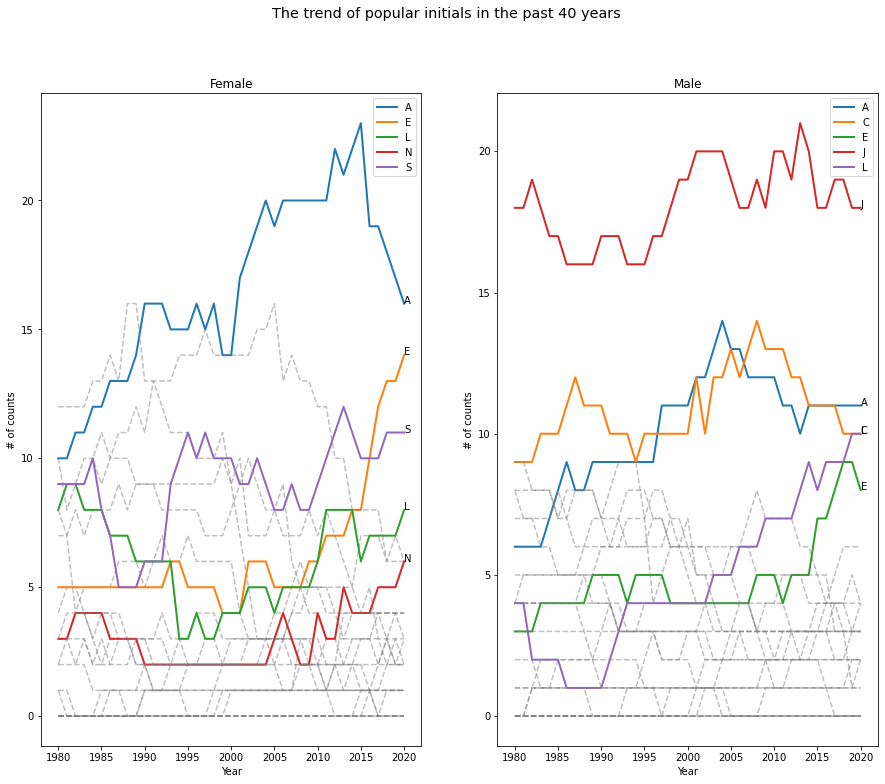

In [ ]:
fig = plt.figure(figsize=(15,12))

plt.subplot(1,2,1)

for letter in alphabet_list:
  if letter in female_ini_top5_2020:
    plt.plot(range(1980, 2021), female_ini_40years[letter], linewidth = 2 ,label=letter)
    plt.annotate(letter, (2020, female_ini_40years[letter].values[-1]))
  else:
    plt.plot(range(1980, 2021), female_ini_40years[letter], linestyle = "--", color = "gray", alpha=0.5)

plt.xlabel("Year")
plt.ylabel("# of counts")
plt.legend()
plt.title("Female")

plt.subplot(1,2,2)

for letter in alphabet_list:
  if letter in male_ini_top5_2020:
    plt.plot(range(1980, 2021), male_ini_40years[letter], linewidth = 2 ,label=letter)
    plt.annotate(letter, (2020, male_ini_40years[letter].values[-1]))
  else:
    plt.plot(range(1980, 2021), male_ini_40years[letter], linestyle = "--", color = "gray", alpha=0.5)

plt.xlabel("Year")
plt.ylabel("# of counts")
plt.legend()
plt.title("Male")

plt.suptitle("The trend of popular initials in the past 40 years", size='x-large')


### What is the most popular name during the past 40 years?

In [ ]:
#What is the 10 most popular name during the past 40 years?

female_names_40years = df1.groupby('Female name')['Number of females'].sum()
female_names_40years = female_names_40years.sort_values(ascending=False)
pd.DataFrame(female_names_40years.head(10))

,Number of females
Female name,
Jessica,866466
Ashley,814356
Emily,717059
Sarah,670976
Jennifer,649419
Elizabeth,606175
Amanda,596615
Samantha,539224
Emma,441635


In [ ]:
male_names_40years = df1.groupby('Male name')['Number of males'].sum()
male_names_40years = male_names_40years.sort_values(ascending=False)
pd.DataFrame(male_names_40years.head(10))

,Number of males
Male name,
Michael,1531341
Christopher,1226567
Matthew,1165132
Joshua,1069669
Daniel,964705
David,941965
James,916237
Joseph,878746
Andrew,871348


### How did the ranks of the all-time popular 10 names change over the past 40 years?

In [ ]:
female_alltime_top10 = female_names_40years[:10].index
df_alltime_female = df1[df1['Female name'].isin(list(female_alltime_top10))]
df_alltime_female = df_alltime_female.pivot_table(values='Rank', index='Year', columns='Female name', aggfunc='first')

In [ ]:
df_alltime_female.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Year')

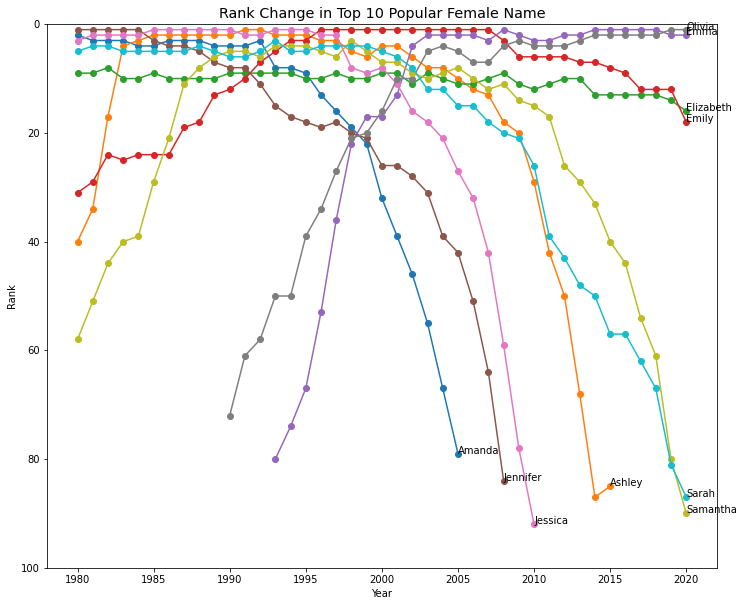

In [ ]:
last_top10_female = pd.DataFrame()

# For annotation
for name in female_alltime_top10:
  series_temp = df_alltime_female[name].dropna()
  last_year = series_temp.index[-1]
  last_rank = series_temp.values[-1]
  last_top10_female = last_top10_female.append(
      {'name': name, 
       'last_year' : last_year,
       'last_rank': last_rank}, ignore_index=True
  )

#last_top10_female

fig = plt.figure(figsize=(12,10))

for name in list(df_alltime_female.columns):
  last_year = last_top10_female[last_top10_female['name']==name].iloc[0,1]
  last_rank = last_top10_female[last_top10_female['name']==name].iloc[0,2]
  plt.plot(df_alltime_female.index, df_alltime_female[name], label = name, marker = 'o')
  plt.annotate(name, (last_year,last_rank))
plt.gca().invert_yaxis()
plt.ylim(100,0)
plt.title('Rank Change in Top 10 Popular Female Name', size='x-large')
plt.ylabel('Rank')
plt.xlabel('Year')
plt.show()

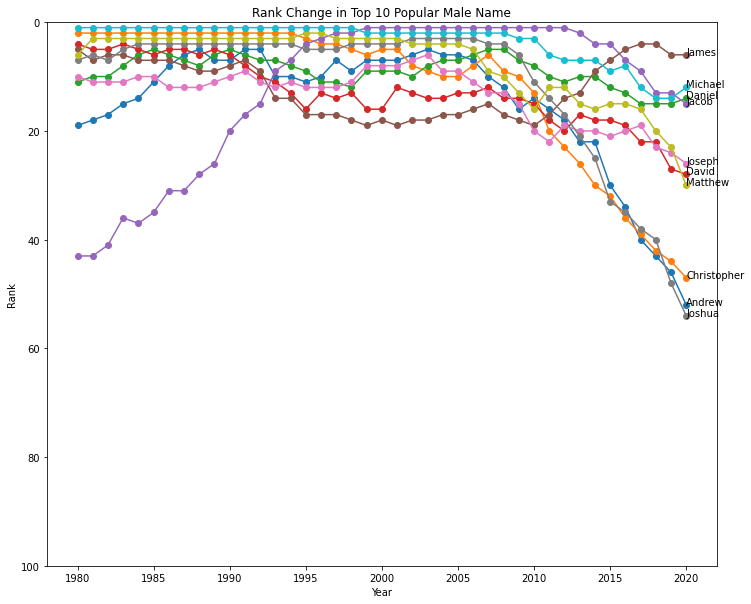

In [ ]:
male_alltime_top10 = male_names_40years[:10].index
df_alltime_male = df1[df1['Male name'].isin(list(male_alltime_top10))]
df_alltime_male = df_alltime_male.pivot_table(values='Rank', index='Year', columns='Male name', aggfunc='first')

last_top10_male = pd.DataFrame()

for name in male_alltime_top10:
  series_temp = df_alltime_male[name].dropna()
  last_year = series_temp.index[-1]
  last_rank = series_temp.values[-1]
  last_top10_male = last_top10_male.append(
      {'name': name, 
       'last_year' : last_year,
       'last_rank': last_rank}, ignore_index=True
  )

fig = plt.figure(figsize=(12,10))

for name in list(df_alltime_male.columns):
  last_year = last_top10_male[last_top10_male['name']==name].iloc[0,1]
  last_rank = last_top10_male[last_top10_male['name']==name].iloc[0,2]
  plt.plot(df_alltime_male.index, df_alltime_male[name], label = name, marker = 'o')
  plt.annotate(name, (last_year,last_rank))
plt.gca().invert_yaxis()
plt.ylim(100,0)
plt.title('Rank Change in Top 10 Popular Male Name')
plt.ylabel('Rank')
plt.xlabel('Year')
plt.show()

In [ ]:
#How did the 10 most popular names change over 40 years?
year = [1980,1990,2000,2010,2020]
df_top10 = df1[df1.Rank <=10]
df_top10_female = df_top10[['Year','Rank','Female name']]
df_top10_female = df_top10_female[df_top10_female['Year'].isin(year)]
#df_top10_female
df_top10_female.pivot_table(values = 'Female name', index = 'Rank', columns='Year', aggfunc='first')

Year,1980,1990,2000,2010,2020
Rank,,,,,
1,Jennifer,Jessica,Emily,Isabella,Olivia
2,Amanda,Ashley,Hannah,Sophia,Emma
3,Jessica,Brittany,Madison,Emma,Ava
4,Melissa,Amanda,Ashley,Olivia,Charlotte
5,Sarah,Samantha,Sarah,Ava,Sophia
6,Heather,Sarah,Alexis,Emily,Amelia
7,Nicole,Stephanie,Samantha,Abigail,Isabella
8,Amy,Jennifer,Jessica,Madison,Mia
9,Elizabeth,Elizabeth,Elizabeth,Chloe,Evelyn


In [ ]:
df_top10_male = df_top10[['Year','Rank','Male name']]
df_top10_male = df_top10_male[df_top10_male['Year'].isin(year)]
df_top10_male.pivot_table(values = 'Male name', index = 'Rank', columns='Year', aggfunc='first')

Year,1980,1990,2000,2010,2020
Rank,,,,,
1,Michael,Michael,Jacob,Jacob,Liam
2,Christopher,Christopher,Michael,Ethan,Noah
3,Jason,Matthew,Matthew,Michael,Oliver
4,David,Joshua,Joshua,Jayden,Elijah
5,James,Daniel,Christopher,William,William
6,Matthew,David,Nicholas,Alexander,James
7,Joshua,Andrew,Andrew,Noah,Benjamin
8,John,James,Joseph,Daniel,Lucas
9,Robert,Justin,Daniel,Aiden,Henry


### How many names survived during the past 40 years? (never dropped from the ranking in the past 40 years)

In [ ]:
survived_female_names = set(df1[df.Year == 1980]['Female name'].values)
survived_male_names = set(df1[df.Year == 1980]['Male name'].values)

for year in range(1981, 2021):

  female_names_current = set(df1[df1.Year == year]['Female name'].values)
  male_names_current = set(df1[df1.Year == year]['Male name'].values)

  survived_female_names = set.intersection(female_names_current, survived_female_names)
  survived_male_names = set.intersection(male_names_current, survived_male_names)

In [ ]:
len(survived_female_names)

7

In [ ]:
survived_female_names

{'Allison', 'Anna', 'Elizabeth', 'Emily', 'Natalie', 'Samantha', 'Sarah'}

In [ ]:
len(survived_male_names)

26

In [ ]:
survived_male_names

{'Aaron',
 'Adam',
 'Alexander',
 'Andrew',
 'Anthony',
 'Benjamin',
 'Charles',
 'Christopher',
 'Daniel',
 'David',
 'Jacob',
 'James',
 'John',
 'Jonathan',
 'Jose',
 'Joseph',
 'Joshua',
 'Matthew',
 'Michael',
 'Nathan',
 'Nicholas',
 'Robert',
 'Ryan',
 'Samuel',
 'Thomas',
 'William'}